<div style="background:#96D225; padding:0.5rem; font-size:1.5rem; text-align:center">
Author: Ikshit Gupta
</div>

# <p style="background-color:#1DB954;font-family:inter;color:#191414;font-size:3rem;text-align:center;border-radius:1rem; padding:1rem">Spotify Songs Analysis 🎶</p>

# <span style="color:#1DB954;">Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter("ignore")

# <span style="color:#1DB954;">Reading Data</span>

In [2]:
df = pd.read_csv("../input/dataset-of-songs-in-spotify/genres_v2.csv")
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [3]:
# Looking for missing values in the dataset
df.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [4]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object

In [5]:
# Dropping values which are not required
df.drop(['id', 'uri', 'track_href', 'analysis_url', 'song_name', 'Unnamed: 0', 'title', 'time_signature', 'type'], axis = 1, inplace = True)

In [6]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'genre'],
      dtype='object')

In [7]:
df.set_index('genre', inplace = True)

In [8]:
df.shape

(42305, 12)

In [9]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000


In [10]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
genre,,,,,,,,,,,,
Dark Trap,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539
Dark Trap,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427
Dark Trap,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821
Dark Trap,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661
Dark Trap,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298


# <span style="color:#1DB954;">Count of each genre</span>

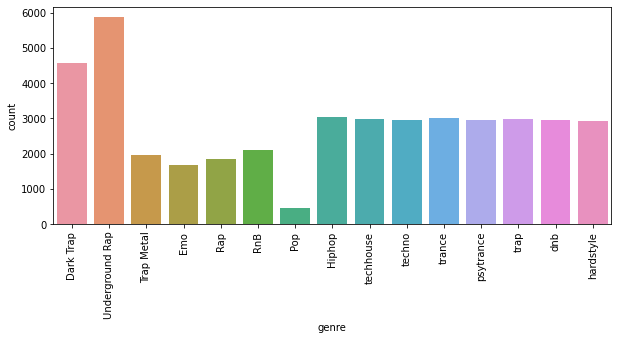

In [11]:
plt.figure(figsize = (10, 4))
plt.xticks(rotation = 90)
sns.countplot(df.index)
plt.show()

# <span style = "color:#432345; font-size:1.3rem"> Underground Rap has the maximum number of instances while Pop has the minimum number of instances. </span>

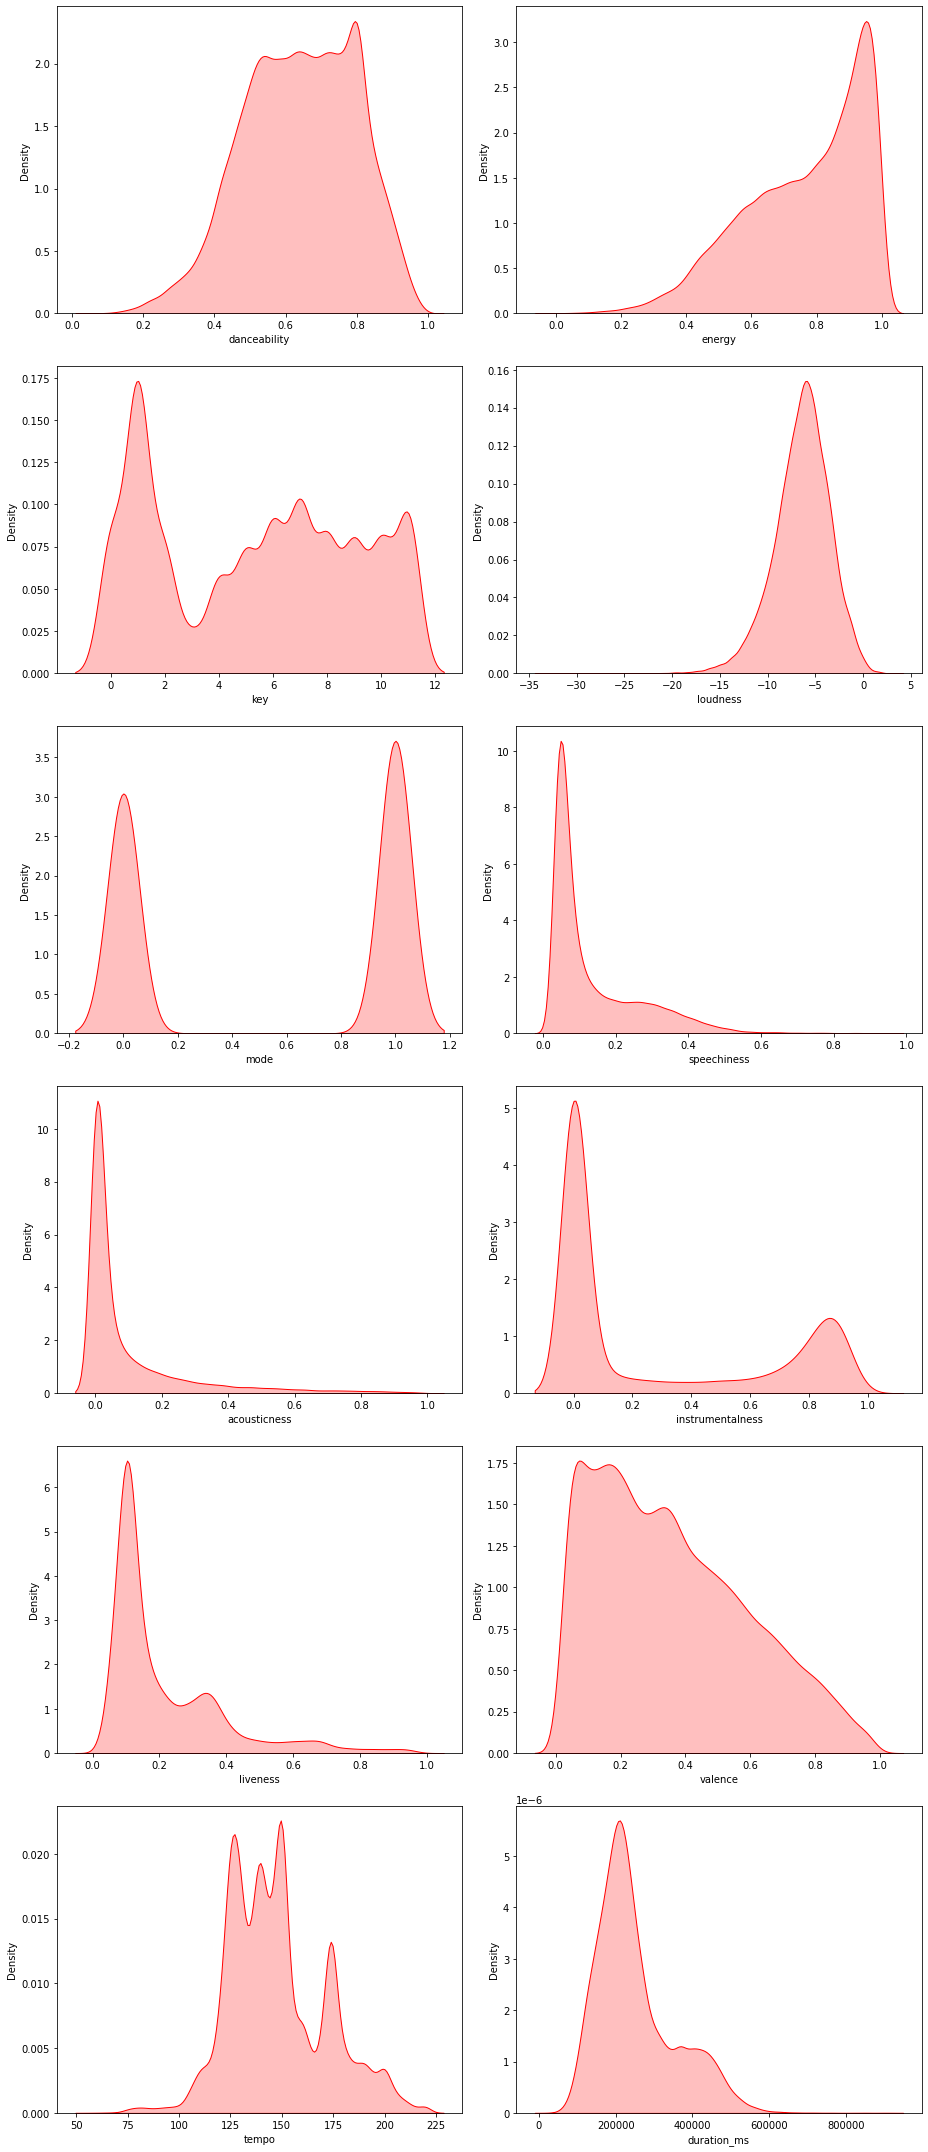

In [12]:
lis = list(df.columns)
fig, axs = plt.subplots(nrows=6, ncols=2, figsize = (13, 30))
axs = np.ravel(axs)
# print(x)
for i, col in enumerate(lis):
    plt.sca(axs[i])
    sns.kdeplot(data=df[col], fill=True, color='red')
plt.tight_layout()

<div style="background:#fae7b5; padding:1rem; font-size:1.5rem">
 
- Danceability follows an approximately normal distribution.</br>
- Energy attribute is negatively skewed.</br>
- The loudness attribute is normally distributed with a few outliers.</br>
- The number of instances with mode 1 is greater than instance with mode 0.</br>
- The Speechiness attribute is positively skewed, meaning that 'speechiness' attribute's mean is greater than the median.</br>
- 'Acousticness', 'instrumentalness', 'liveness', and 'valence' attributes are all positively skewed.</br>
- The "temp" and "duration_ms" attributes seems to have a normal distribution.</br>
</div>

# <span style="color:#1DB954;">Average of the attributes in each genre</span>

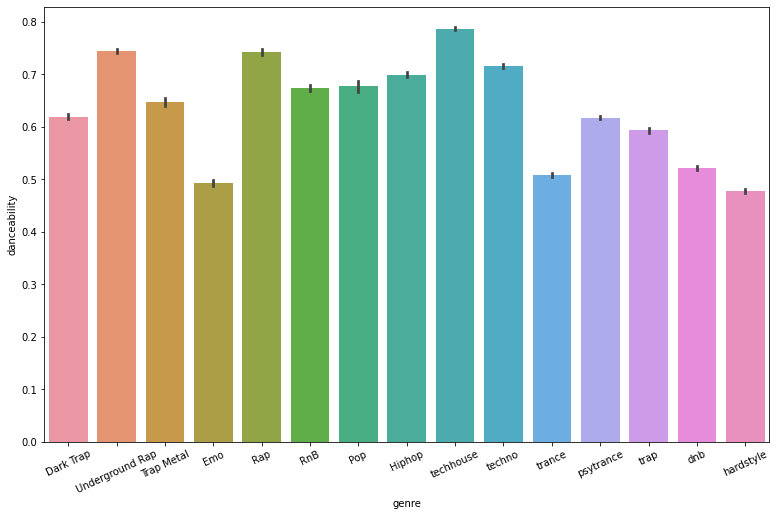

In [13]:
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=df, x=df.index, y='danceability')
plt.show()

# <span style = "color:#432345; font-size:1.3rem;"> Songs in the genre Techhouse have the highest average danceability, followed by Underground Rap while Emo genre has the lowest average danceability. </span>

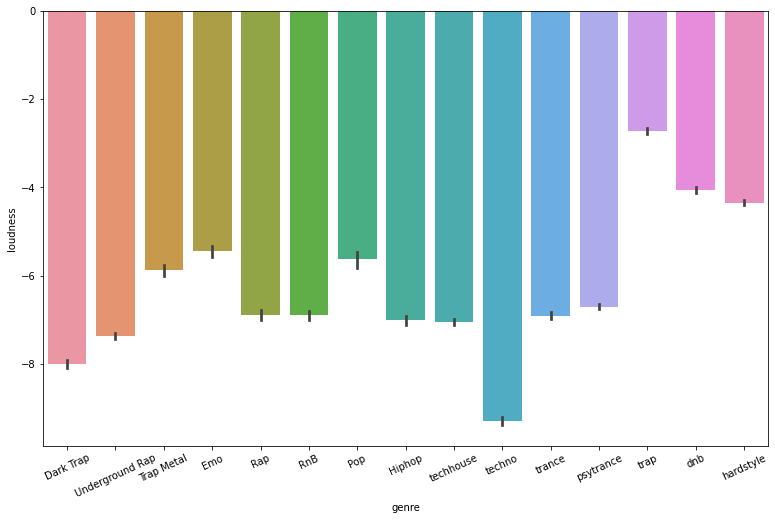

In [14]:
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=df, x=df.index, y='loudness')
plt.show()

# <span style = "color:#432345; font-size:1.3rem;"> Songs in all the genres have loudness scores in negative. Songs in the genre Trap have the highest average loudness, followed by DNB while Techno genre has the lowest average loudness. </span>

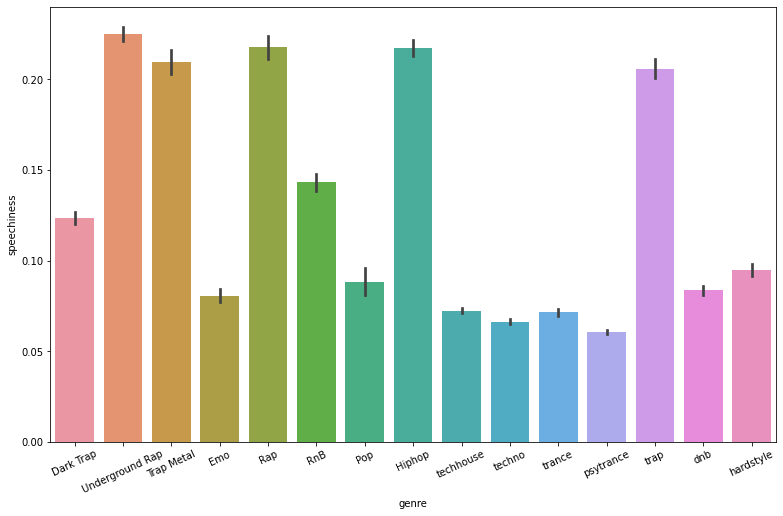

In [15]:
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=df, x=df.index, y='speechiness')
plt.show()

# <span style = "color:#432345; font-size:1.3rem;"> Songs in the genre Underground Rap have the highest average speechiness, followed by Rap while Psytrance genre has the lowest average speechiness. </span>

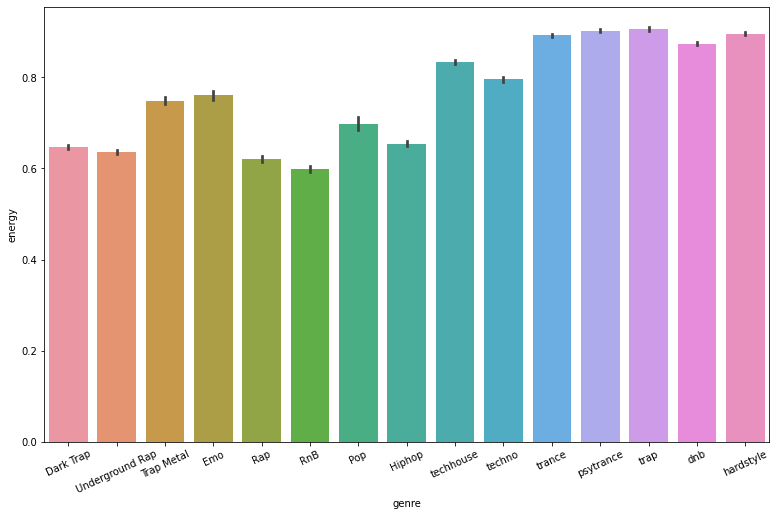

In [16]:
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=df, x=df.index, y='energy')
plt.show()

# <span style = "color:#432345; font-size:1.3rem;"> Songs in the genre Trap have the highest average energy, followed by Psytrance while RNB genre has the lowest average energy. </span>

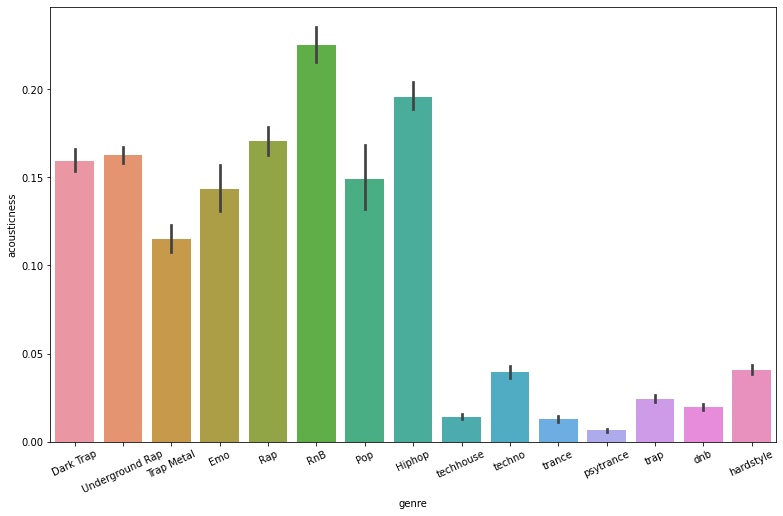

In [17]:
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=df, x=df.index, y='acousticness')
plt.show()

# <span style = "color:#432345; font-size:1.3rem;"> Songs in the genre RNB have the highest average acousticness, followed by Hiphop while Psytrance genre has the lowest average acousticness. </span>

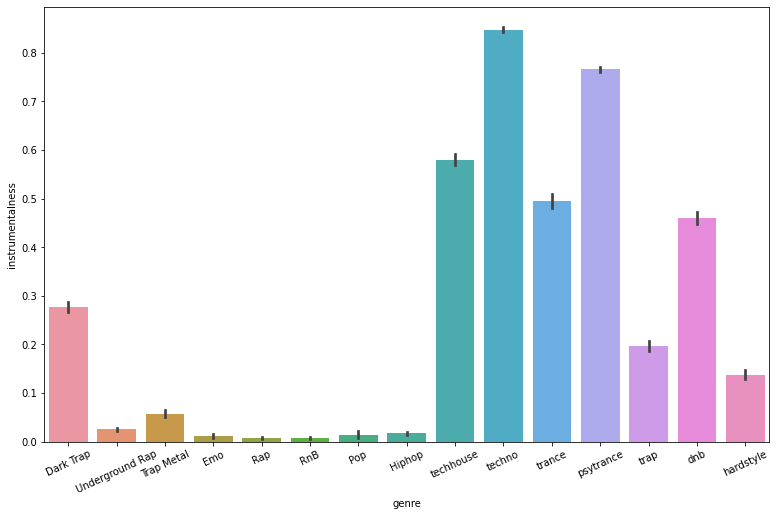

In [18]:
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=df, x=df.index, y='instrumentalness')
plt.show()

# <span style = "color:#432345; font-size:1.3rem;"> Songs in the genre Techno have the highest average instrumentalness, followed by Psytrance while Rap genre has the lowest average instrumentalness. </span>

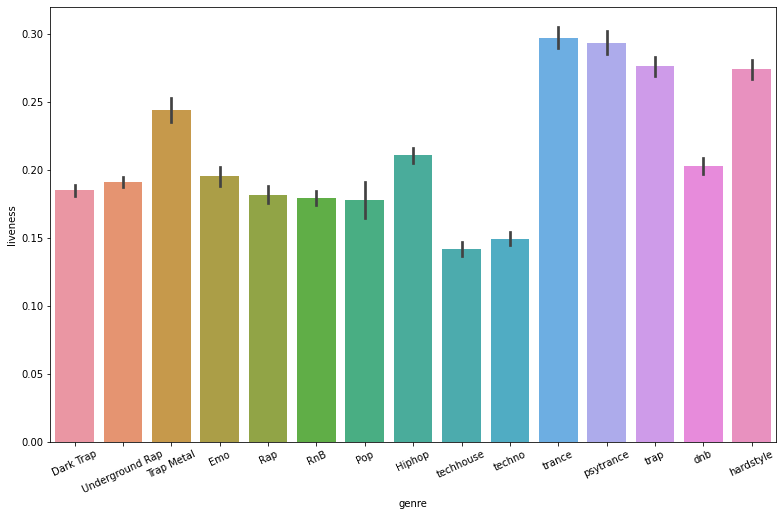

In [19]:
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=df, x=df.index, y='liveness')
plt.show()

# <span style = "color:#432345; font-size:1.3rem;"> Songs in the genre Trance have the highest average liveness, followed by Psytrance while Techhouse genre has the lowest average liveness. </span>

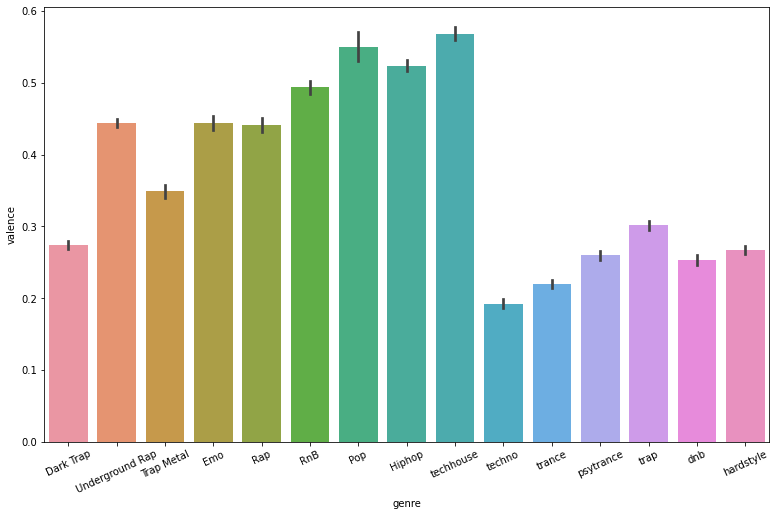

In [20]:
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=df, x=df.index, y='valence')
plt.show()

# <span style = "color:#432345; font-size:1.3rem;"> Songs in the genre Techhouse have the highest average valence, followed by Pop while Techno genre has the lowest average valence. </span>

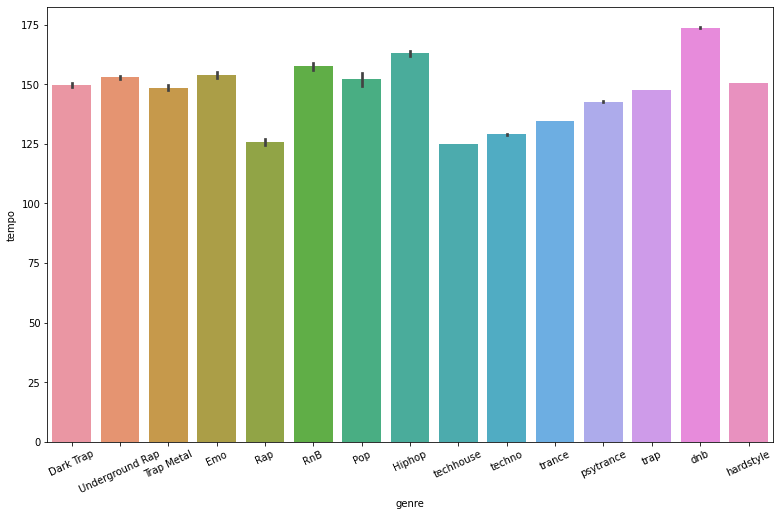

In [21]:
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=df, x=df.index, y='tempo')
plt.show()

# <span style = "color:#432345; font-size:1.3rem;"> Songs in the genre DNB have the highest average tempo, followed by Hiphop while Techhouse genre has the lowest average tempo. </span>

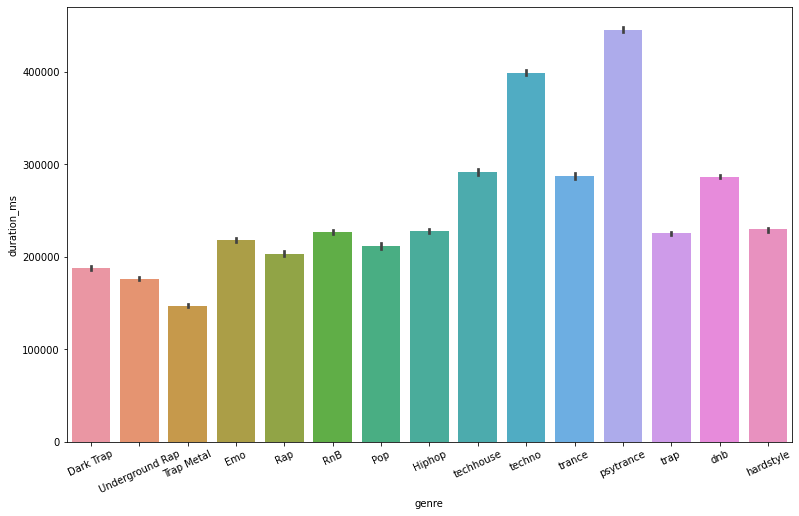

In [22]:
plt.figure(figsize = (13, 8))
plt.xticks(rotation=25)
sns.barplot(data=df, x=df.index, y='duration_ms')
plt.show()

# <span style = "color:#432345; font-size:1.3rem;"> Songs in the genre Psytrance & Techno are longer than all other genres </span>

In [23]:
data = (df
        .groupby(['genre', 'mode'])['mode']
        .count()
        .unstack(1))

data.style.background_gradient(cmap=plt.cm.coolwarm_r)

mode,0,1
genre,,
Dark Trap,2122,2456
Emo,528,1152
Hiphop,1430,1598
Pop,208,253
Rap,883,965
RnB,982,1117
Trap Metal,552,1404
Underground Rap,2270,3605
dnb,1643,1323


# <span style = "color:#432345; font-size:1.3rem;"> Songs in the genre Underground Rap have the highest occurences in both modes. </span>

# <span style="color:#1DB954;">Correlation between attributes</span>

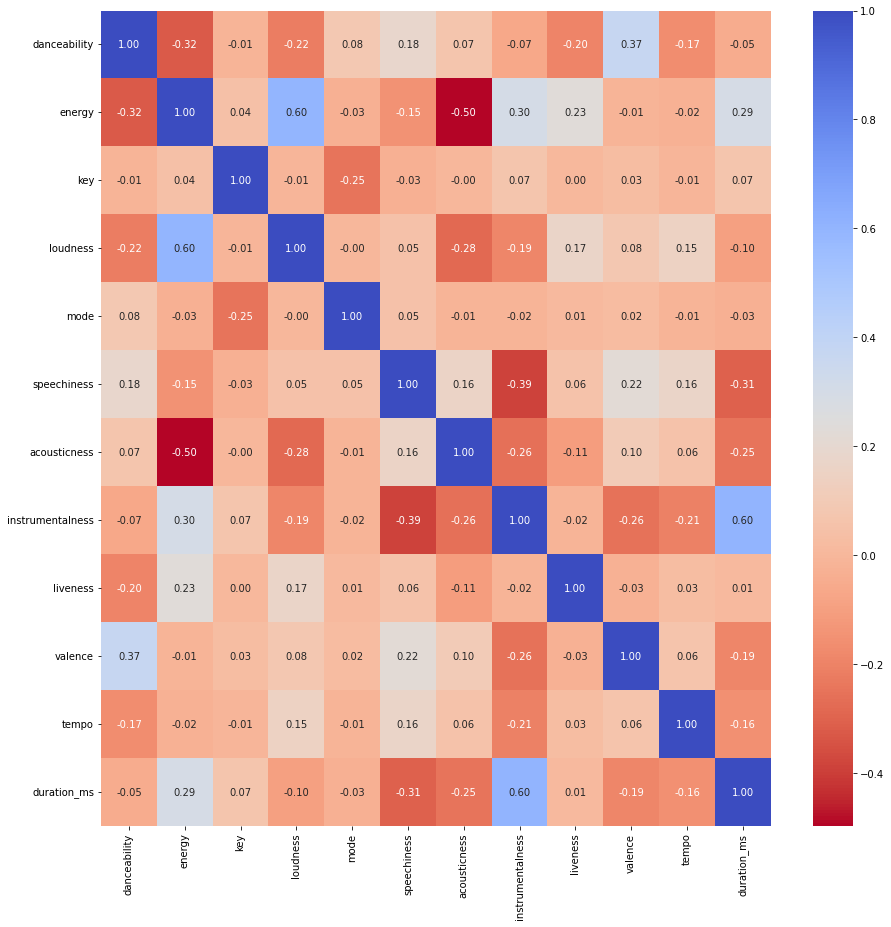

In [24]:
corr_mat = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_mat,
            annot=True,
            fmt='.2f',
            cmap=plt.cm.coolwarm_r,
           )
plt.show()

# <span style = "color:#432345; font-size:1.3rem;"> Here positive value means that the two attributes have positive correlation between them. </span>

# <span style="color:#1DB954;">Effect of each of the attributes with energy.</span>

<AxesSubplot:xlabel='instrumentalness', ylabel='energy'>

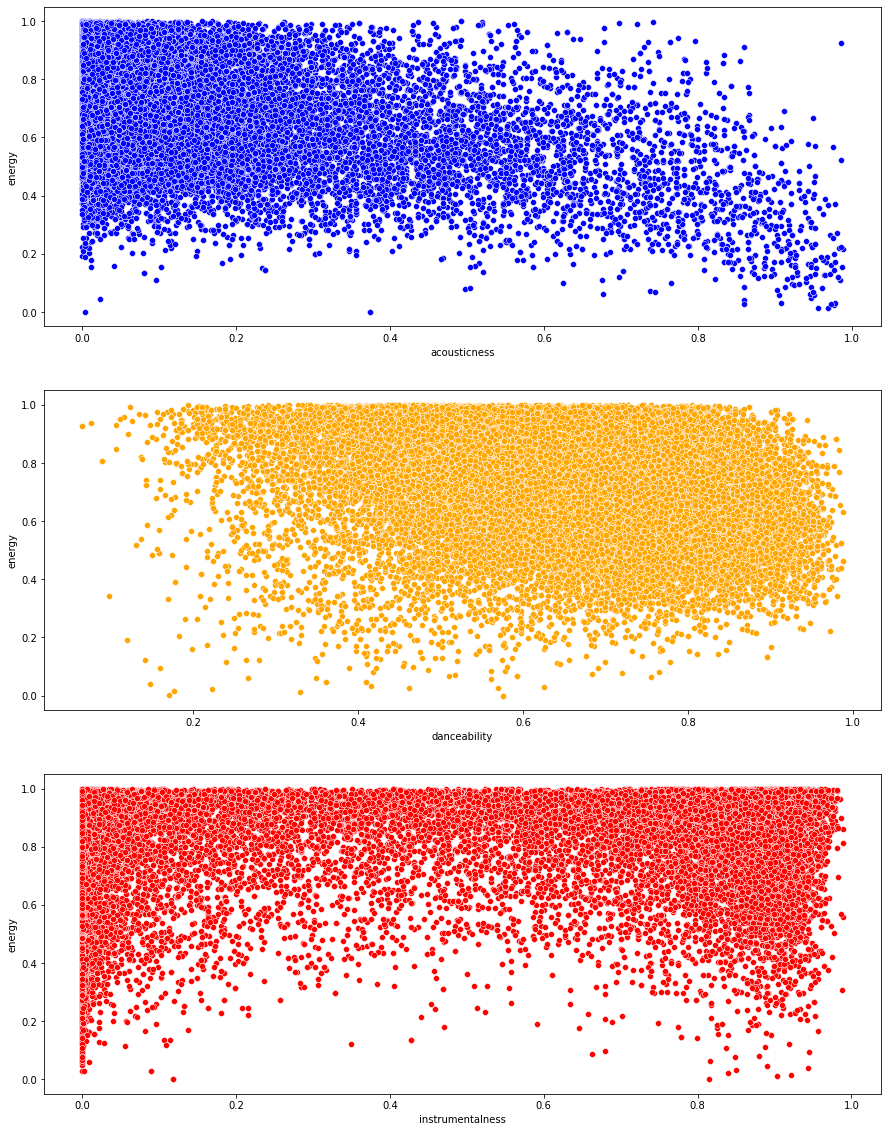

In [25]:
fig, ax =plt.subplots(3,1, figsize=(15,20))
sns.scatterplot(x = df['acousticness'], y = df['energy'], ax = ax[0], color = "blue")
sns.scatterplot(x = df['danceability'], y = df['energy'], ax = ax[1], color = "orange")
sns.scatterplot(x = df['instrumentalness'], y = df['energy'], ax = ax[2], color = "red")

<AxesSubplot:xlabel='duration_ms', ylabel='energy'>

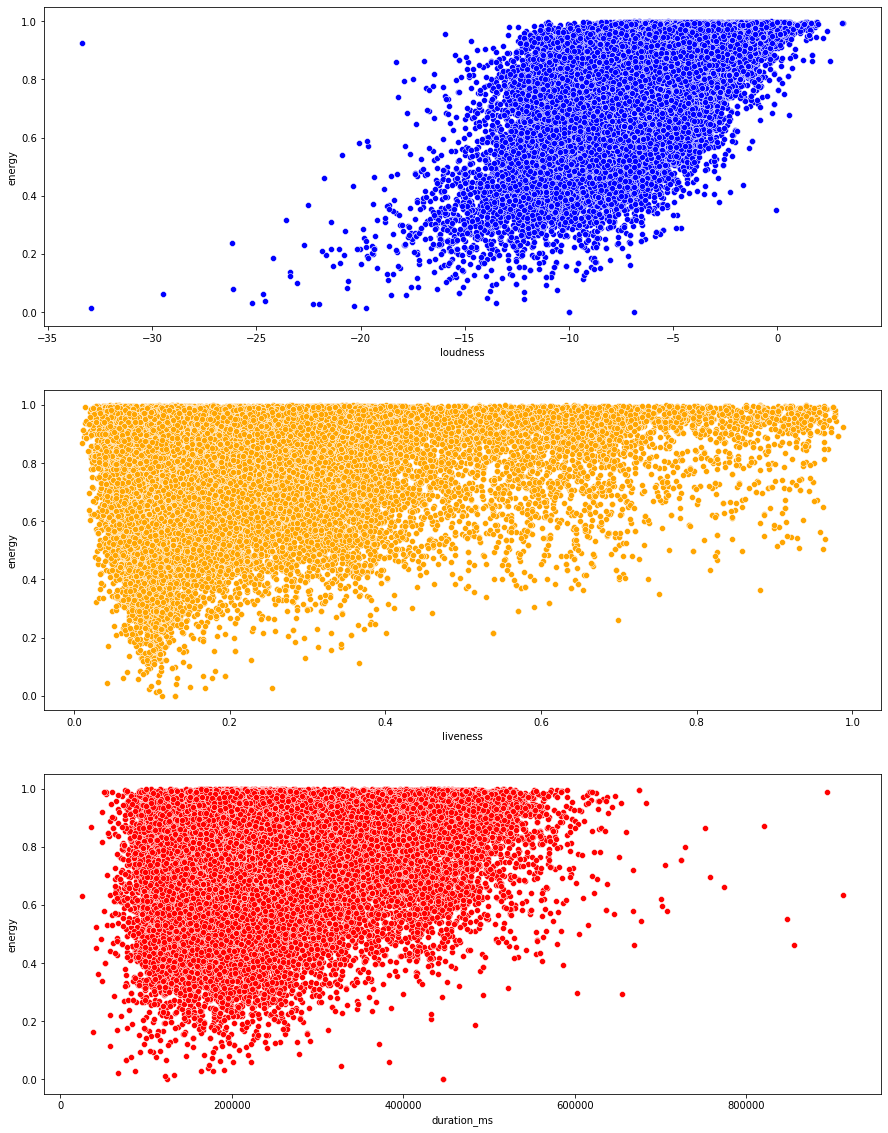

In [26]:
fig, ax =plt.subplots(3,1, figsize=(15,20))
sns.scatterplot(x = df['loudness'], y = df['energy'], ax = ax[0], color = "blue")
sns.scatterplot(x = df['liveness'], y = df['energy'], ax = ax[1], color = "orange")
sns.scatterplot(x = df['duration_ms'], y = df['energy'], ax = ax[2], color = "red")

<AxesSubplot:xlabel='valence', ylabel='energy'>

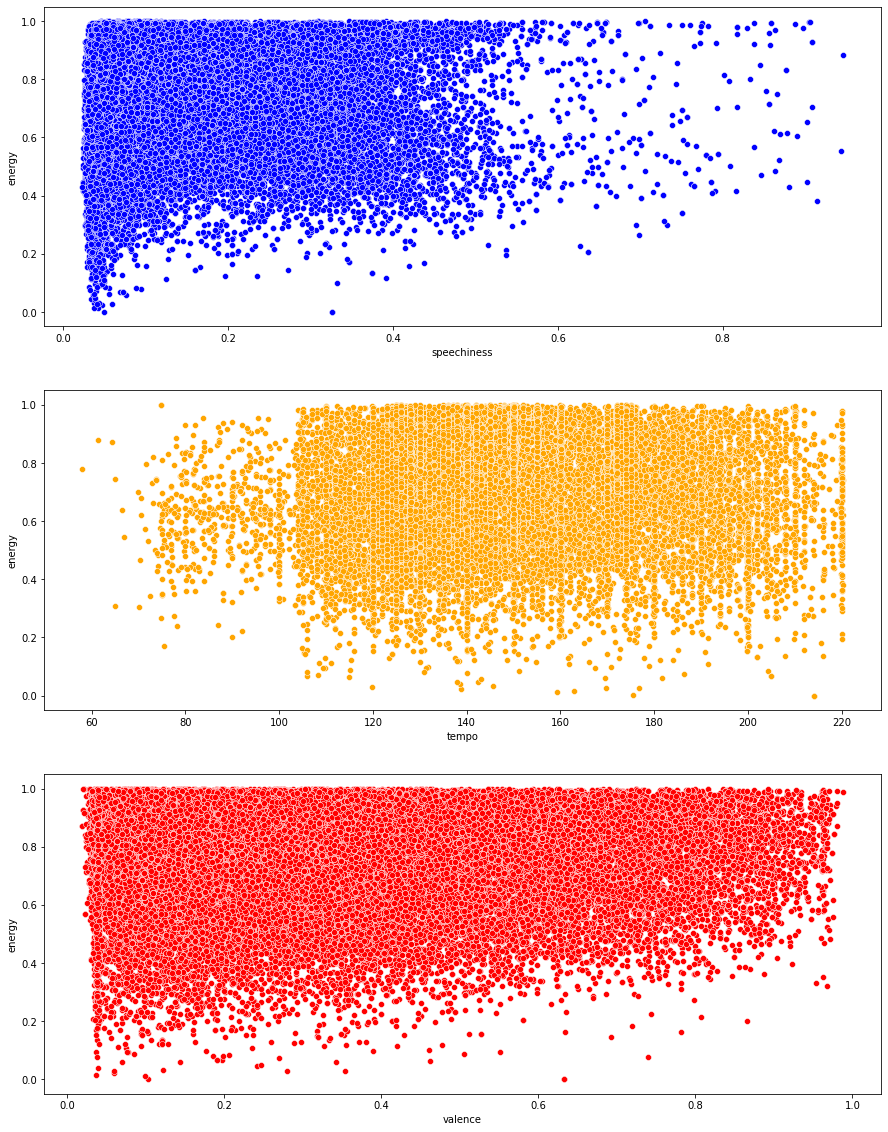

In [27]:
fig, ax =plt.subplots(3,1, figsize=(15,20))
sns.scatterplot(x = df['speechiness'], y = df['energy'], ax = ax[0], color = "blue")
sns.scatterplot(x = df['tempo'], y = df['energy'], ax = ax[1], color = "orange")
sns.scatterplot(x = df['valence'], y = df['energy'], ax = ax[2], color = "red")

In [28]:
year_wise_data = pd.read_csv("../input/spotifydata-19212020/data.csv")
year_wise_data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

# <span style="color:#1DB954;">Number of songs on spotify each year</span>

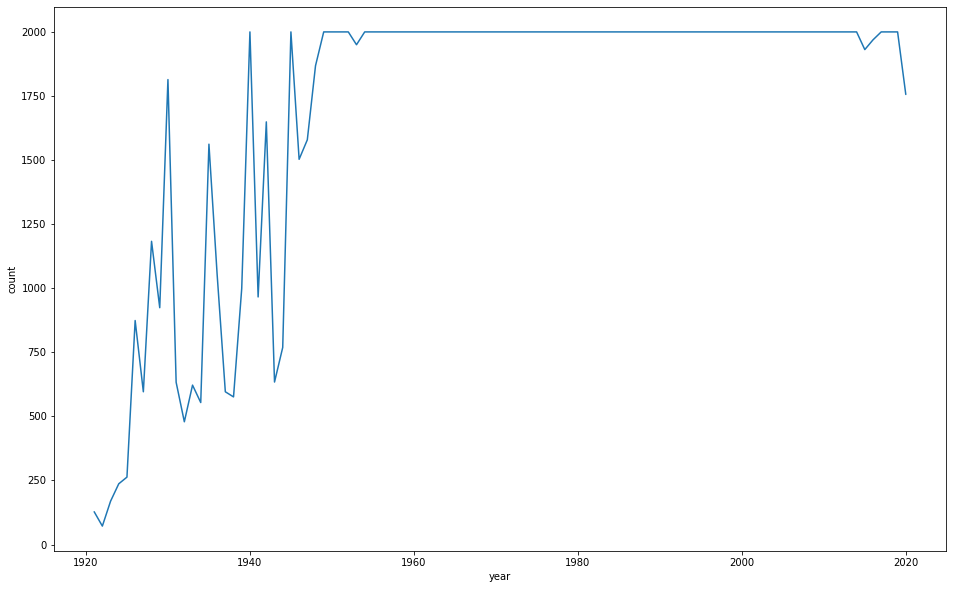

In [29]:
plt.figure(figsize=(16, 10))
plt.ylabel("count")
sns.set(style="whitegrid")
x = year_wise_data.groupby("year")["id"].count()
axis = sns.lineplot(x.index,x)

# <span style="color:#1DB954;">Yearwise analysis of each attribute</span>

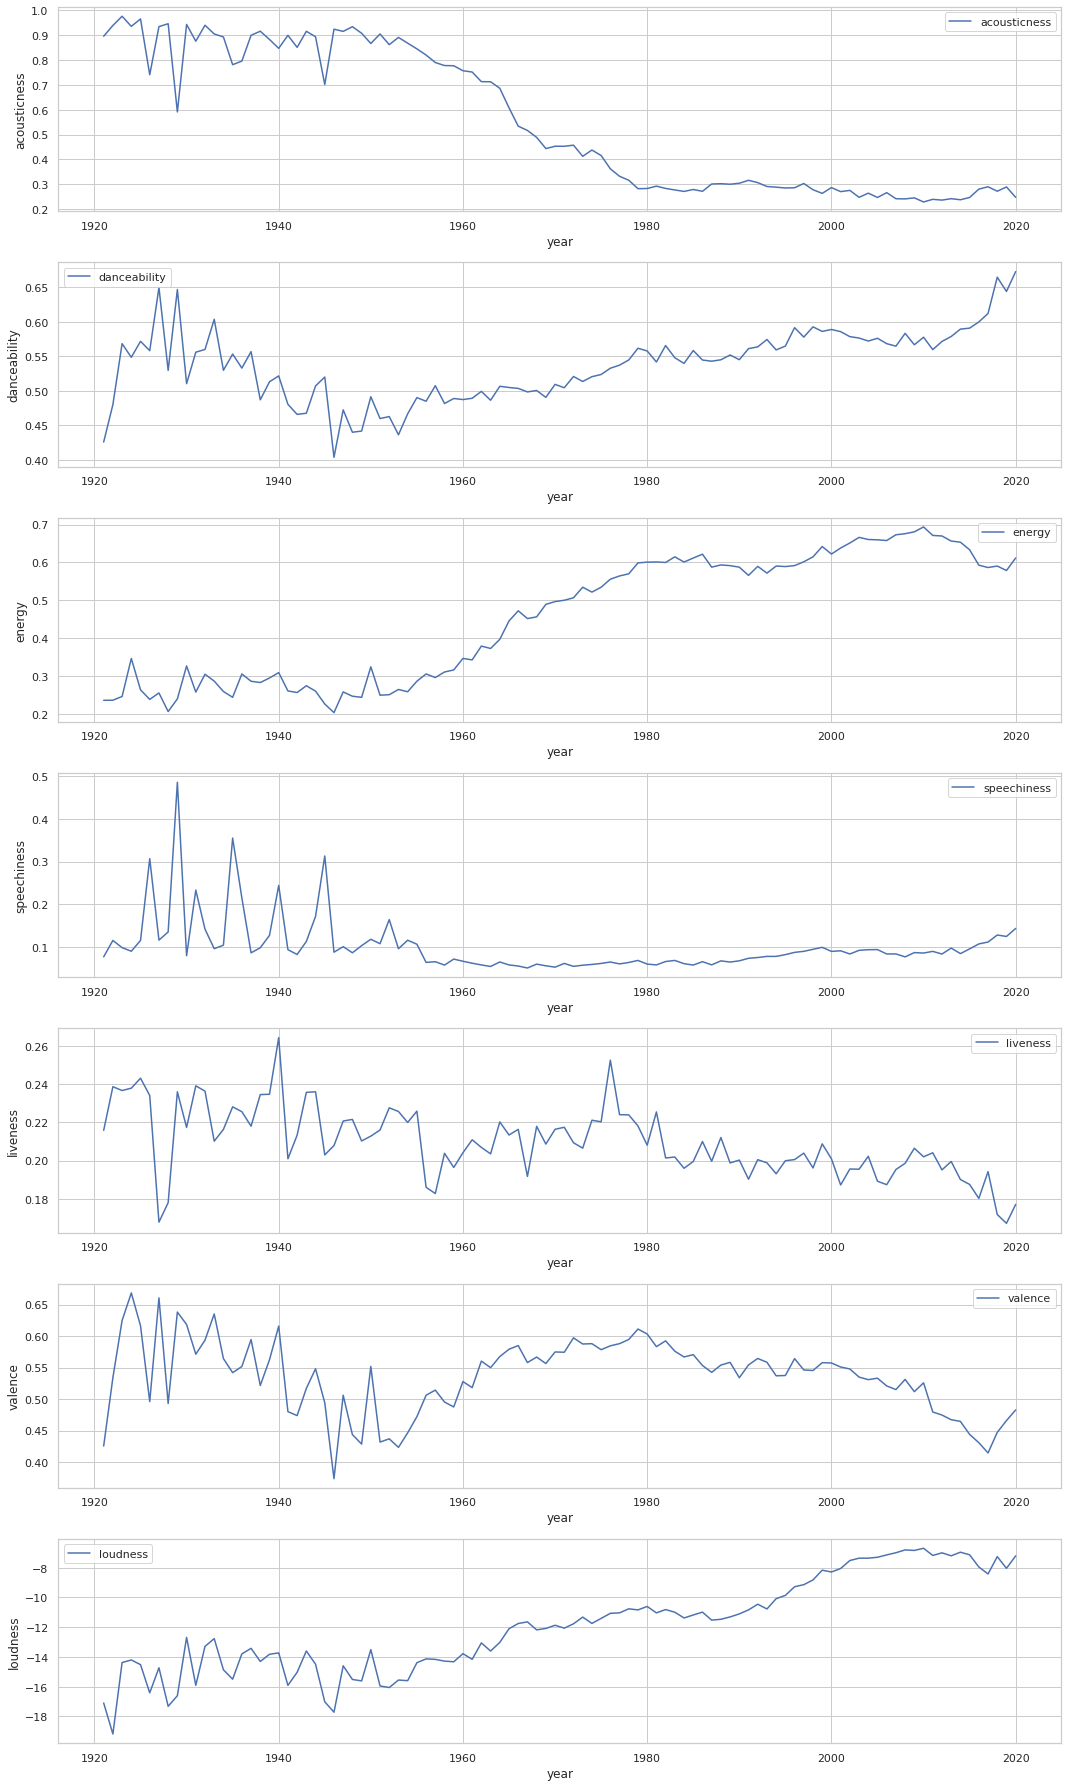

In [30]:
fig, ax = plt.subplots(7, 1, figsize = (15, 25))
columns = ["acousticness","danceability","energy","speechiness","liveness","valence", "loudness"]
i = 0
for col in columns:
    x = year_wise_data.groupby("year")[col].mean()
    sns.lineplot(x=x.index,y=x,label=col, ax = ax[i])
    i += 1
plt.tight_layout()